# CNN Architecture 
## for Music Classification encoded as mel-spectrogram's
. Architecture is based on the VGG architecture.

.

.

### *Importing Libraries*

In [2]:
from os.path import samefile

# imports
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder


### *Importing data*
and print example


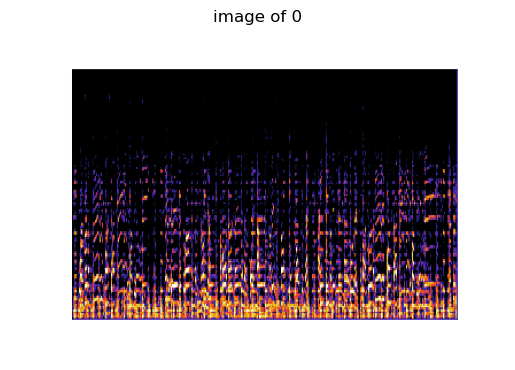

In [3]:
# Data directory
data_dir = "./images_original"

# Load full the dataset with original image size
dataset = ImageFolder(data_dir, transform=transforms.Compose([transforms.Resize((288, 432)), # Adjust to original image size
transforms.ToTensor()]))

#  extract first picture to display
img, label = dataset[0]

train_images = img.unsqueeze(1)


# add empty dimension at first position
test_image = train_images[0].unsqueeze(0) # pytorch requires the batch dim. img[0] would yield 1, 28, 28 but we need 1, 1, 28, 28. unsquueze(0) adds a dimension at position 0

# show  the image we are passing
plt.title(f"image of {label}")
plt.imshow(test_image.view(288, 432), cmap = 'CMRmap')
plt.axis('off')
# plt.tight_layout(pad=0)
plt.show()

### *CNN Architecture - shape adjustment*

Here only the shape-affecting layers are considered, all others are ignerd so far... 

In [15]:
print('Inital shape:',  test_image.shape, '\n')

# ---------------------- 1. block -----------------------
print('1. Block')
conv1_1 = nn.Conv2d(1, 8, 3, padding='same') # initialize first conv layer
out_c1_1 = conv1_1(test_image) # output after applying the first convolutional layer
print('Out C1_1: ', out_c1_1.shape)

conv_1_2 = nn.Conv2d(8, 8, 3, padding = 'same')
out_c1_2 = conv_1_2(out_c1_1) 
print('Out C1_1: ', out_c1_2.shape)

max_pool_1 =  nn.MaxPool2d(2, 2) # 2x2 filter and stride = 2
out_pool_1 = max_pool_1(out_c1_2) 
print('Out Pool 1: ', out_pool_1.shape, '\n')

# ---------------------- 2. block -----------------------
print('2. Block')
conv2_1 = nn.Conv2d(8, 16, 3, padding='same') # initialize first conv layer
out_c2_1 = conv2_1(out_pool_1) # output after applying the first convolutional layer
print('Out C2_1: ', out_c2_1.shape)

conv_2_2 = nn.Conv2d(16, 16, 3, padding = 'same')
out_c2_2 = conv_2_2(out_c2_1) 
print('Out C2_2: ', out_c2_2.shape)

max_pool_2 =  nn.MaxPool2d(2, 2) # 2x2 filter and stride = 2
out_pool_2 = max_pool_2(out_c2_2) 
print('Out Pool 2: ', out_pool_2.shape, '\n')

# ---------------------- 3. block -----------------------
print('3. Block')
conv3_1 = nn.Conv2d(16, 32, 3, padding='same') 
out_c3_1 = conv3_1(out_pool_2) 
print('Out C3_1: ', out_c3_1.shape)

conv3_2 = nn.Conv2d(32, 32, 3, padding='same')
out_c3_2 = conv3_2(out_c3_1) 
print('Out C3_2: ', out_c3_2.shape)

conv3_3 = nn.Conv2d(32, 32, 3, padding='same') 
out_c3_3 = conv3_3(out_c3_2) 
print('Out C3_3: ', out_c3_3.shape)

conv3_4 = nn.Conv2d(32, 32, 3, padding='same') 
out_c3_4 = conv3_4(out_c3_3) 
print('Out C3_4: ', out_c3_4.shape)

max_pool_3 =  nn.MaxPool2d(2, 2) # 2x2 filter and stride = 2
out_pool_3 = max_pool_3(out_c3_4) 
print('Out Pool 3: ', out_pool_3.shape, '\n')

# ---------------------- 4. block -----------------------
print('4. Block')
conv4_1 = nn.Conv2d(32, 32, 3, padding='same') 
out_c4_1 = conv4_1(out_pool_3) 
print('Out C4_1: ', out_c4_1.shape)

conv4_2 = nn.Conv2d(32, 32, 3, padding='same') 
out_c4_2 = conv4_2(out_c4_1) 
print('Out C4_2: ', out_c4_2.shape)

conv4_3 = nn.Conv2d(32, 32, 3, padding='same') # initialize first conv layer
out_c4_3 = conv4_3(out_c4_2) # output after applying the first convolutional layer
print('Out C4_3: ', out_c4_3.shape)

conv4_4 = nn.Conv2d(32, 32, 3, padding='same') # initialize first conv layer
out_c4_4 = conv4_4(out_c4_3) # output after applying the first convolutional layer
print('Out C4_4: ', out_c4_4.shape)

max_pool_4 =  nn.MaxPool2d(2, 2) # 2x2 filter and stride = 2
out_pool_4 = max_pool_4(out_c4_4) 
print('Out Pool 4: ', out_pool_4.shape, '\n')

# ---------------------- 5. block -----------------------
print('5. Block')
conv5_1 = nn.Conv2d(512, 512, 3, padding='same') 
out_c5_1 = conv5_1(out_pool_4) 
print('Out C5_1: ', out_c5_1.shape)

conv5_2 = nn.Conv2d(512, 512, 3, padding='same') 
out_c5_2 = conv5_2(out_c5_1) 
print('Out C5_2: ', out_c5_2.shape)

conv5_3 = nn.Conv2d(512, 512, 3, padding='same') # initialize first conv layer
out_c5_3 = conv5_3(out_c5_2) # output after applying the first convolutional layer
print('Out C5_3: ', out_c5_3.shape)

conv5_4 = nn.Conv2d(512, 512, 3, padding='same') # initialize first conv layer
out_c5_4 = conv5_4(out_c5_3) # output after applying the first convolutional layer
print('Out C5_4: ', out_c5_4.shape)

max_pool_5 =  nn.MaxPool2d(2, 2) # 2x2 filter and stride = 2
out_pool_5 = max_pool_5(out_c5_4) 
print('Out Pool 5: ', out_pool_5.shape, '\n')

# ---------------------- Flattening -----------------------
print("Flattening")
flat = out_pool_5.view(1, -1) # need to flatten (i.e turn into a one dimensional tensor (of shape Batch, channels*w*h))
print('Out flatten: ',flat.shape, '\n')

# -------------- Fully connected Layers -----------------
print('FC Layers')
fc1 = nn.Linear(flat.shape[1], 4096)
fc1_out = fc1(flat)
print('Out fc1: ',fc1_out.shape)

fc2 = nn.Linear(fc1_out.shape[1], 1024)
fc2_out = fc2(fc1_out)
print('Out fc2: ',fc2_out.shape)

fc3 = nn.Linear(fc2_out.shape[1], 128)
fc3_out = fc3(fc2_out)
print('Out fc2: ',fc3_out.shape)

fc4 = nn.Linear(fc3_out.shape[1], 10)
fc4_out = fc4(fc3_out)
print('Out fc2: ',fc4_out.shape)

Inital shape: torch.Size([1, 1, 288, 432]) 

1. Block
Out C1_1:  torch.Size([1, 8, 288, 432])
Out C1_1:  torch.Size([1, 8, 288, 432])
Out Pool 1:  torch.Size([1, 8, 144, 216]) 

2. Block
Out C2_1:  torch.Size([1, 16, 144, 216])
Out C2_2:  torch.Size([1, 16, 144, 216])
Out Pool 2:  torch.Size([1, 16, 72, 108]) 

3. Block
Out C3_1:  torch.Size([1, 32, 72, 108])
Out C3_2:  torch.Size([1, 32, 72, 108])
Out C3_3:  torch.Size([1, 32, 72, 108])
Out C3_4:  torch.Size([1, 32, 72, 108])
Out Pool 3:  torch.Size([1, 32, 36, 54]) 

4. Block
Out C4_1:  torch.Size([1, 32, 36, 54])
Out C4_2:  torch.Size([1, 32, 36, 54])
Out C4_3:  torch.Size([1, 32, 36, 54])
Out C4_4:  torch.Size([1, 32, 36, 54])
Out Pool 4:  torch.Size([1, 32, 18, 27]) 

5. Block


RuntimeError: Given groups=1, weight of size [512, 512, 3, 3], expected input[1, 32, 18, 27] to have 512 channels, but got 32 channels instead

### *CNN Architecture - Class for modular layer building*
Class to build a dynamic layer architecture 

In [12]:
class CNN_dynamic(nn.Module):
    def __init__(self, conv_configs, linear_sizes):
        """
        conv_configs: list of tuples -> [(out_channels, kernel_size, padding), ...]
        linear_sizes: list with numbers of neurons for each fc layer -> [input_size, hidden1, hidden2, ..., output_size]
        """
        super().__init__()
        self.conv_layers = nn.ModuleList()
        input_channels = 1 # the input pictures have only one channel
        for output_channels, kernel_size, padding, use_pool in conv_configs:
            self.conv_layers.append(nn.Conv2d(input_channels, output_channels, kernel_size, padding = padding))
            self.conv_layers.append(nn.ReLU())
            if use_pool: # functionality to avoid pooling at the end of a layer
                self.conv_layers.append(nn.MaxPool2d(2, 2))
            input_channels = output_channels # reasing the input channel to the output channels of the previous layer
            
        self.flatten = nn.Flatten()
        
        self.linear_layers = nn.ModuleList()
        for i in range(len(linear_sizes) -1):
            self.linear_layers.append(nn.Linear(linear_sizes[i], linear_sizes[i+1]))
            if i < len(linear_sizes) - 2:
                self.linear_layers.append(nn.ReLU())
            
        self.linear_layers.append(nn.Softmax(dim = 1))
    
    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
        x = self.flatten(x)
        for layer in self.linear_layers:
            x = layer(x)
        return x
                

### *CNN Architecture - initialization of the layers*


In [13]:
# initialize conv layers
conv_configs = [(1, 4, 3, False), (4, 4, 3, True), 
                (4, 8, 3, False), (8, 8, 3, True), 
                (8, 8, 3, False), (8, 8, 3, False), (8, 8, 3, False), (8, 8, 3, True)]
linear_sizes = [15552, 4096, 1024, 128, 10]

model = CNN_dynamic(conv_configs, linear_sizes)